# **Import Library**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets


import matplotlib as mpl
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#สร้างฟ้อน+สี
import matplotlib as mpl
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')

In [ ]:
#สำหรับสร้างกราฟ
import pandas as pd
import re

import matplotlib as mpl
#mpl.font_manager.fontManager.addfont('THSarabunNew.ttf')
mpl.rc('font', family='TH Sarabun New', size = 20)
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'TH Sarabun New' 
plt.rcParams['font.size'] = 20

from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

# **Open train Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/SWU 61/CP490/Project/train.csv')
print(df_train.shape)
df_train.head()

(7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df_train.shape

(7613, 5)

In [ ]:
df_train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

เนื่องจากจะนำ column keyword มาใช้ในโมเดล จึง Drop NaN ใน keyword

In [ ]:
#df_train = df_train[df_train['keyword'].notna()]

In [ ]:
df_train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
df_train.shape

(7613, 5)

# **EDA**

0    4342
1    3271
Name: target, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


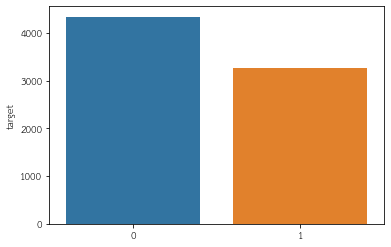

In [ ]:
# CLASS DISTRIBUTION
#ดูว่าข้อมูลทั้ง 2 class มีจำนวนใกล้เคัยงกันรึไม่
x=df_train['target'].value_counts() 
print(x)
sns.barplot(x.index,x)

In [ ]:
#1. WORD-COUNT นับแต่ละทวิตมีกี่คำ 
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
print('WORD COUNT')

print('Disaster tweets:{}'.format(df_train[df_train['target']==1]['word_count'].mean())) #Disaster tweets
print('Non-Disaster tweets:{}'.format(df_train[df_train['target']==0]['word_count'].mean())) #Non-Disaster tweets
#Disaster tweets are more wordy than the non-disaster tweets

#2. CHARACTER-COUNT บันแต่ละทวิตมีกี่ตัวอักษร
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
print('CHARACTER-COUNT')

print('Disaster tweets:{}'.format(df_train[df_train['target']==1]['char_count'].mean())) #Disaster tweets
print('Non-Disaster tweets:{}'.format(df_train[df_train['target']==0]['char_count'].mean())) #Non-Disaster tweets
#Disaster tweets are longer than the non-disaster tweets

#3. UNIQUE WORD-COUNT นับคำในทวิตแต่ไม่นับคำซ้ำ
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))
print('UNIQUE WORD-COUNT')

print('Disaster tweets:{}'.format(df_train[df_train['target']==1]['unique_word_count'].mean())) #Disaster tweets
print('Non-Disaster tweets:{}'.format(df_train[df_train['target']==0]['unique_word_count'].mean())) #Non-Disaster tweets

WORD COUNT
Disaster tweets:15.167532864567411
Non-Disaster tweets:14.704744357438969
CHARACTER-COUNT
Disaster tweets:108.11342097217977
Non-Disaster tweets:95.70681713496084
UNIQUE WORD-COUNT
Disaster tweets:14.664934270865178
Non-Disaster tweets:14.09649930907416


In [ ]:
df_disaster = df_train.loc[df_train['target'] == 1]
df_N_disaster = df_train.loc[df_train['target'] == 0]

# **เปรียบเทียบ Word_count,char_count,unique_word_count ของ target = 1 และ 0**

In [ ]:
df_disaster[["word_count", "char_count","unique_word_count"]].describe()
#word max 30 min 2  mean 15


,word_count,char_count,unique_word_count
count,3271.000000,3271.000000,3271.000000
mean,15.167533,108.113421,14.664934
std,5.096806,29.309854,4.710934
min,2.000000,14.000000,2.000000
25%,11.000000,88.000000,11.000000
50%,15.000000,115.000000,15.000000
75%,19.000000,136.000000,18.000000
max,30.000000,151.000000,28.000000


In [ ]:
df_N_disaster[["word_count", "char_count","unique_word_count"]].describe()

,word_count,char_count,unique_word_count
count,4342.000000,4342.000000,4342.000000
mean,14.704744,95.706817,14.096499
std,6.161564,35.885924,5.654748
min,1.000000,7.000000,1.000000
25%,10.000000,68.000000,10.000000
50%,15.000000,101.000000,14.000000
75%,19.000000,130.000000,18.000000
max,31.000000,157.000000,29.000000


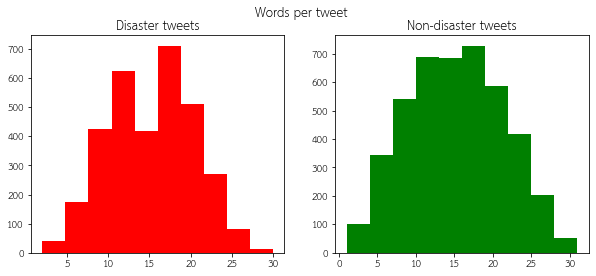

In [ ]:
#Plotting word-count per tweet (จำนวนคำต่อทวิต)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df_train[df_train['target']==1]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Disaster tweets')
train_words=df_train[df_train['target']==0]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Non-disaster tweets')
fig.suptitle('Words per tweet')
plt.show()
#แนวตั้ง จน.คนทวิต แนวนอนคือคำ 

# **Text preprocessing**

In [ ]:
#1. Common text preprocessing
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  adjacent spaces and tabs     .  "

#convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower() #lowercase text ตัวเล็ก
    text=text.strip()  #get rid of leading/trailing whitespace กำจัดช่องว่าง
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups 
    text =re.sub('https?://[A-Za-z0-9./]+'," ",text)
    #text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs ช่องว่างผิดปกติและtabออก
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip()) #
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    return text

text=preprocess(text)
print(text)  #text is a string

this is a message to be cleaned it may involve some things like adjacent spaces and tabs


In [ ]:
#LEXICON-BASED TEXT PROCESSING EXAMPLES
 
#2. STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

text=stopword(text)
print(text)

#3. STEMMING
 
# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)
text=stemming(text)
print(text)

#4. LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

text = lemmatizer(text)
print(text)

message cleaned may involve things like adjacent spaces tabs
messag clean may involv thing like adjac space tab
messag clean may involv thing like adjac space tab


In [ ]:
#FINAL PREPROCESSING
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

df_train['clean_text'] = df_train['text'].apply(lambda x: finalpreprocess(x))
df_train=df_train.drop(columns=['word_count','char_count','unique_word_count'])
df_train.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,get sent photo ruby alaska smoke wildfires pou...


In [ ]:
df_cleankey = df_train.copy()

In [ ]:
df_cleankey = df_cleankey[df_cleankey['keyword'].notna()]

In [ ]:
df_cleankey['clean_key'] = df_cleankey['keyword'].apply(lambda x: finalpreprocess(x))
#df_train=df_train.drop(columns=['word_count','char_count','unique_word_count'])
df_cleankey.head()

,id,keyword,location,text,target,clean_text,clean_key
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,bbcmtd wholesale market ablaze,ablaze
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,always try bring heavy metal rt,ablaze
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,africanbaze break news nigeria flag set ablaze...,ablaze
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,cry set ablaze,ablaze
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,plus side look sky last night ablaze,ablaze


In [ ]:
df_disaster = df_cleankey.loc[df_cleankey['target'] == 1]
df_N_disaster = df_cleankey.loc[df_cleankey['target'] == 0]


In [ ]:
#ใหม่เพิ่ม
#disaster count keyword
df_disaster_key = pd.DataFrame(df_disaster['keyword'].value_counts())
#disaster count location
df_disaster_lo = pd.DataFrame(df_disaster['location'].value_counts())

#Non disaster count keyword
df_N_disaster_key = pd.DataFrame(df_N_disaster['keyword'].value_counts())
#Non disaster count Location
df_N_disaster_lo = pd.DataFrame(df_N_disaster['location'].value_counts())

In [ ]:
#disaster count keyword
df_disaster_key = pd.DataFrame(df_disaster['clean_key'].value_counts())
#disaster count location
df_disaster_lo = pd.DataFrame(df_disaster['location'].value_counts())

#Non disaster count keyword
df_N_disaster_key = pd.DataFrame(df_N_disaster['clean_key'].value_counts())
#Non disaster count Location
df_N_disaster_lo = pd.DataFrame(df_N_disaster['location'].value_counts())

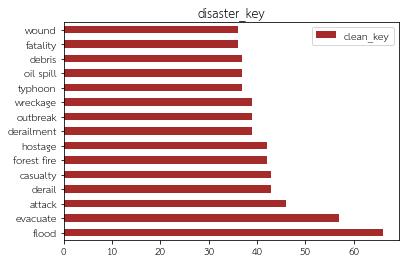

In [ ]:
df_disaster_key.head(15).plot(kind='barh',title = 'disaster_key',color=tuple(["brown"]))
plt.style.use('classic')
mpl.rc('font',family='TH Sarabun New',size=15)

#graph compare disaster VS non disaster
#15 ค่าที่พบบ่อยในkeyword ของ2 target 




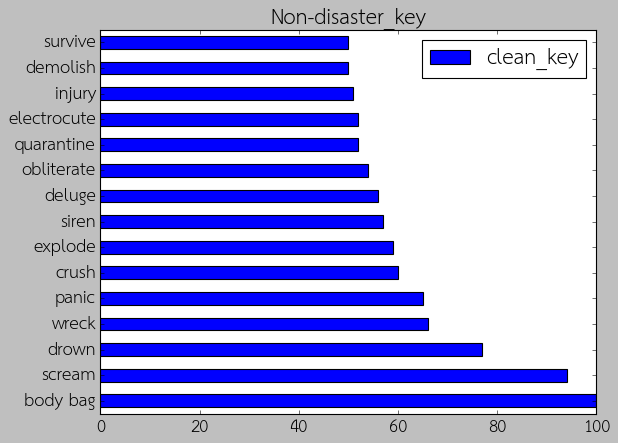

In [ ]:
df_N_disaster_key.head(15).plot(kind='barh',title = 'Non-disaster_key',color=tuple(["blue"]))
plt.style.use('classic')
mpl.rc('font',family='TH Sarabun New',size=15)

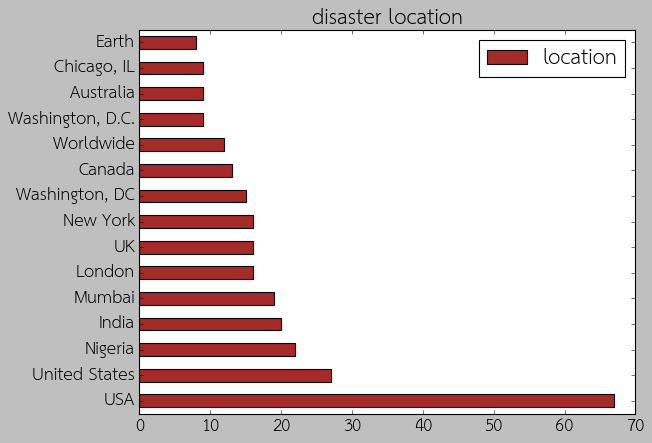

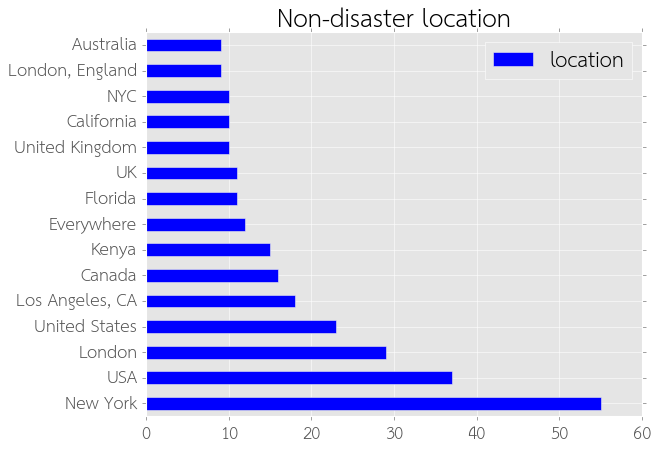

In [ ]:
df_disaster_lo.head(15).plot(kind='barh',title = 'disaster location',color=tuple(["brown"]))
plt.style.use('ggplot')
mpl.rc('font',family='TH Sarabun New',size=15)

df_N_disaster_lo.head(15).plot(kind='barh',title = 'Non-disaster location',color=tuple(["blue"]))
plt.style.use('ggplot')
mpl.rc('font',family='TH Sarabun New',size=15)

# **ดูความถี่ของคำสำหรับ target = 1 (เกิดภัยพิบัติ) เพื่อดูแนวโน้มของคำที่อยู่บนข้อความสำหรับแจ้งเกี่ยวกับภัยพิบัติ**

In [ ]:
df_train['clean_text_tok']=[nltk.word_tokenize(i) for i in df_train['clean_text']]

In [ ]:
df_dis = df_train.copy()
df_dis = df_dis.loc[df_dis['target'] == 1]
df_dis.head()

,id,keyword,location,text,target,clean_text,clean_text_tok
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,"[deed, reason, earthquake, may, allah, forgive..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,"[resident, ask, shelter, place, notify, office..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,"[people, receive, wildfire, evacuation, order,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,get sent photo ruby alaska smoke wildfires pou...,"[get, sent, photo, ruby, alaska, smoke, wildfi..."


In [ ]:
df_dis['text_sp'] = df_dis['clean_text_tok'].values
df_dis = df_dis.explode('text_sp')

In [ ]:
#จำนวนคำ target = 1
df_dis.shape

(31789, 8)

In [ ]:
df_dis['text_sp'].value_counts().head(25)

fire          271
kill          157
news          151
bomb          146
amp           135
disaster      122
via           121
get           121
california    115
flood         115
suicide       112
year          112
crash         111
u             110
police        109
people        106
home          105
family        105
attack        104
train         102
like          101
storm          96
say            95
hiroshima      93
pm             86
Name: text_sp, dtype: int64

In [ ]:
df_non_dis = df_train.copy()
df_non_dis = df_non_dis.loc[df_non_dis['target'] == 0]
df_non_dis.head()

,id,keyword,location,text,target,clean_text,clean_text_tok
15,23,NaN,NaN,What's up man?,0,man,[man]
16,24,NaN,NaN,I love fruits,0,love fruit,"[love, fruit]"
17,25,NaN,NaN,Summer is lovely,0,summer lovely,"[summer, lovely]"
18,26,NaN,NaN,My car is so fast,0,car fast,"[car, fast]"
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,goooooooaaaaaal,[goooooooaaaaaal]


In [ ]:
df_non_dis['text_sp'] = df_non_dis['clean_text_tok'].values
df_non_dis = df_non_dis.explode('text_sp')

In [ ]:
#จำนวนคำ target = 0
df_non_dis.shape

(38343, 8)

In [ ]:
df_non_dis['text_sp'].value_counts().head(25)

get       317
like      292
amp       209
go        198
new       172
u         154
one       138
make      131
body      118
love      117
see       114
time      109
come      107
say       106
bag       105
day       104
would     101
video     101
know      100
via        99
want       98
people     95
think      94
look       91
scream     91
Name: text_sp, dtype: int64

In [ ]:
df_dis.drop(df_dis.index[df_dis['text_sp'] == 'amp'], inplace = True)
df_dis.drop(df_dis.index[df_dis['text_sp'] == 'u'], inplace = True)
#df_dis.drop(df_dis.index[df_dis['text_sp'] == 'co'], inplace = True)
#df_dis.drop(df_dis.index[df_dis['text_sp'] == 'http'], inplace = True)
df_dis.drop(df_dis.index[df_dis['text_sp'] == 'get'], inplace = True)
df_dis.drop(df_dis.index[df_dis['text_sp'] == 'via'], inplace = True)
df_dis.drop(df_dis.index[df_dis['text_sp'] == 'people'], inplace = True)
df_dis.drop(df_dis.index[df_dis['text_sp'] == 'like'], inplace = True)
df_dis.drop(df_dis.index[df_dis['text_sp'] == 'say'], inplace = True)
df_dis.drop(df_dis.index[df_dis['text_sp'] == 'go'], inplace = True)
df_dis.drop(df_dis.index[df_dis['text_sp'] == 'come'], inplace = True)
df_dis.drop(df_dis.index[df_dis['text_sp'] == 'time'], inplace = True)
df_dis.drop(df_dis.index[df_dis['text_sp'] == 'make'], inplace = True)
df_dis.drop(df_dis.index[df_dis['text_sp'] == 'one'], inplace = True)

In [ ]:
df_dis['text_sp'].value_counts().head(20)

fire          191
news          130
bomb          111
kill          101
family         96
disaster       94
california     91
flood          90
suicide        90
home           84
police         84
year           83
train          81
pm             80
crash          80
attack         71
storm          71
hiroshima      69
wildfire       67
old            64
Name: text_sp, dtype: int64

In [ ]:
traincount = df_dis['text_sp'].value_counts()
traincount = pd.DataFrame(traincount)


In [ ]:
plt.rcParams["figure.figsize"] = (10,10)

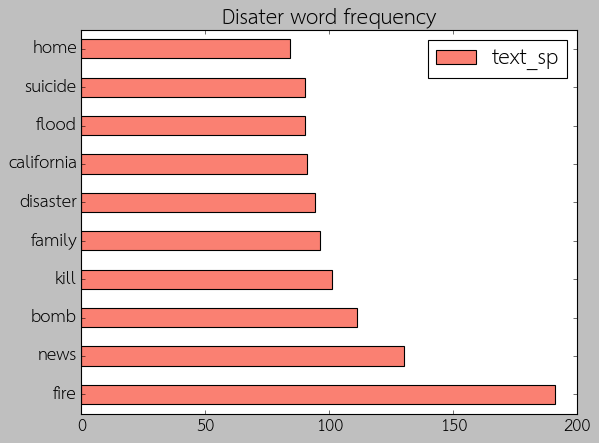

In [ ]:

traincount.head(10).plot(kind='barh',title = 'Disater word frequency',color=tuple(["salmon"]))
plt.style.use('classic')
mpl.rc('font',family='TH Sarabun New',size=15)

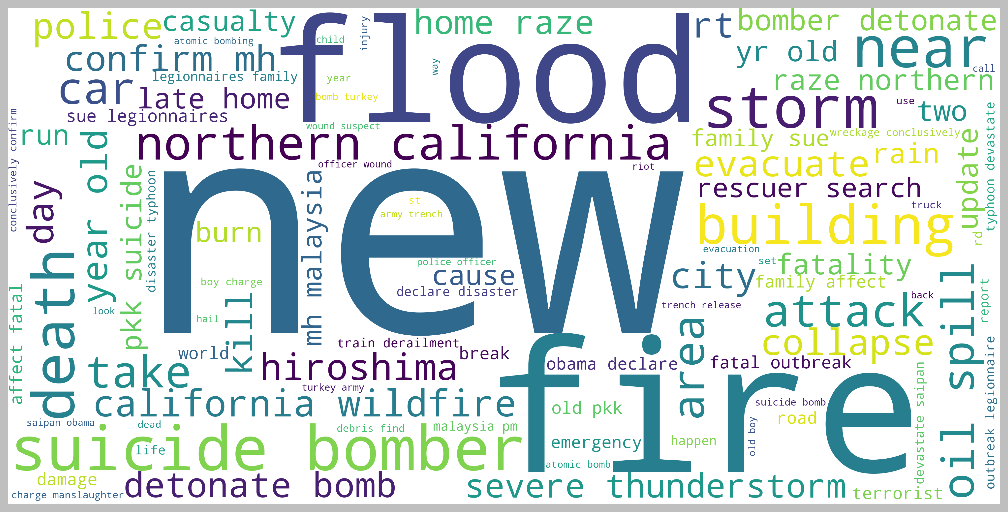

In [ ]:
word_all = " ".join(text for text in df_dis['text_sp'])
path = 'thsarabunnew-webfont.ttf'
reg = r"[A-Za-z0-9./]+"
wordcloud = WordCloud(stopwords=text, background_color = 'white', max_words=100, height = 2000, width=4000,  regexp=reg).generate(word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **ดูความถี่ของคำสำหรับ target = 0 (ไม่เกิดภัยพิบัติ) เพื่อดูแนวโน้มของคำที่อยู่บนข้อความสำหรับแจ้งเกี่ยวกับภัยพิบัติ**

In [ ]:
df_non_dis = df_train.copy()
df_non_dis = df_non_dis.loc[df_non_dis['target'] == 0]
df_non_dis.head()

,id,keyword,location,text,target,clean_text,clean_text_tok
15,23,NaN,NaN,What's up man?,0,man,[man]
16,24,NaN,NaN,I love fruits,0,love fruit,"[love, fruit]"
17,25,NaN,NaN,Summer is lovely,0,summer lovely,"[summer, lovely]"
18,26,NaN,NaN,My car is so fast,0,car fast,"[car, fast]"
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,goooooooaaaaaal,[goooooooaaaaaal]


In [ ]:
df_non_dis['text_sp'] = df_non_dis['clean_text_tok'].values
df_non_dis = df_non_dis.explode('text_sp')

In [ ]:
#จำนวนคำ target = 0
df_non_dis.shape

(38343, 8)

In [ ]:
df_non_dis['text_sp'].value_counts().head(20)

get      317
like     292
amp      209
go       198
new      172
u        154
one      138
make     131
body     118
love     117
see      114
time     109
come     107
say      106
bag      105
day      104
would    101
video    101
know     100
via       99
Name: text_sp, dtype: int64

In [ ]:
df_non_dis.drop(df_non_dis.index[df_non_dis['text_sp'] == 'amp'], inplace = True)
df_non_dis.drop(df_non_dis.index[df_non_dis['text_sp'] == 'u'], inplace = True)
df_non_dis.drop(df_non_dis.index[df_non_dis['text_sp'] == 'get'], inplace = True)
df_non_dis.drop(df_non_dis.index[df_non_dis['text_sp'] == 'via'], inplace = True)
df_non_dis.drop(df_non_dis.index[df_non_dis['text_sp'] == 'people'], inplace = True)
df_non_dis.drop(df_non_dis.index[df_non_dis['text_sp'] == 'go'], inplace = True)
df_non_dis.drop(df_non_dis.index[df_non_dis['text_sp'] == 'time'], inplace = True)
df_non_dis.drop(df_non_dis.index[df_non_dis['text_sp'] == 'say'], inplace = True)
df_non_dis.drop(df_non_dis.index[df_non_dis['text_sp'] == 'make'], inplace = True)
df_non_dis.drop(df_non_dis.index[df_non_dis['text_sp'] == 'one'], inplace = True)
df_non_dis.drop(df_non_dis.index[df_non_dis['text_sp'] == 'come'], inplace = True)
df_non_dis.drop(df_non_dis.index[df_non_dis['text_sp'] == 'new'], inplace = True)

In [ ]:
traincount0 = pd.DataFrame(df_non_dis['text_sp'].value_counts())

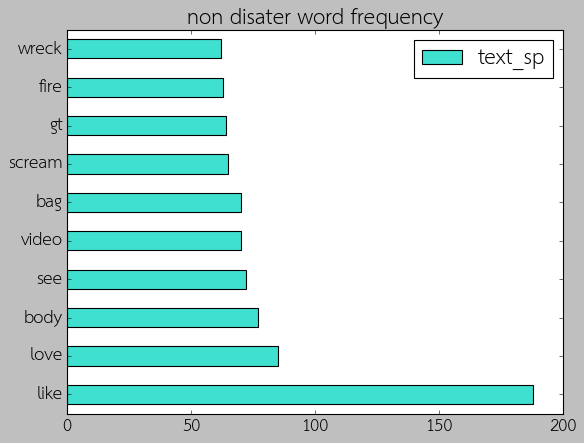

In [ ]:

traincount0.head(10).plot(kind='barh',title = 'non disater word frequency',color=tuple(["turquoise"]))
plt.style.use('classic')
mpl.rc('font',family='TH Sarabun New',size=15)

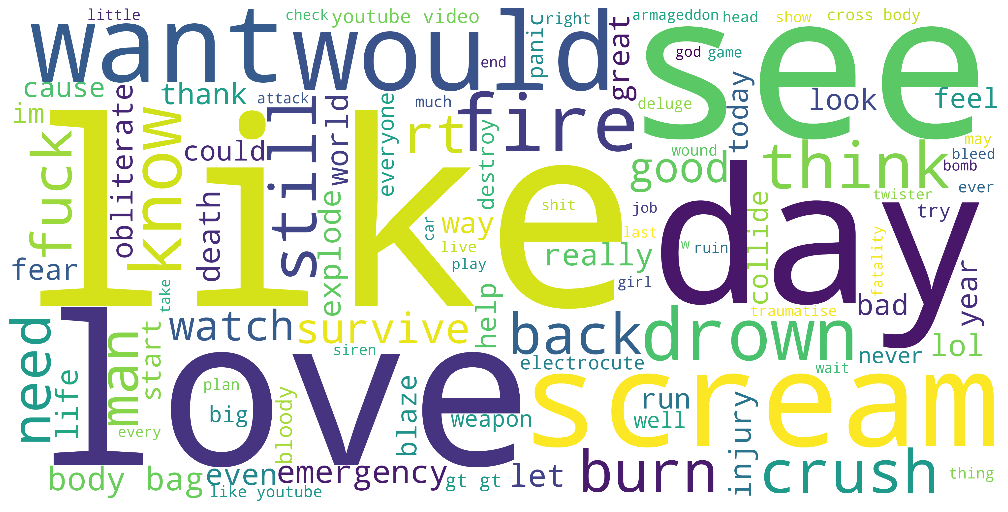

In [ ]:
word_all = " ".join(text for text in df_non_dis['text_sp'])
path = 'thsarabunnew-webfont.ttf'
reg = r"[A-Za-z0-9./]+"
wordcloud = WordCloud(stopwords=text, background_color = 'white', max_words=100, height = 2000, width=4000,  regexp=reg).generate(word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **PCA : ข้อมูล 10 แถว**

In [ ]:
df_train_2 = df_train.head(20)


In [ ]:
# create Word2vec model 
#here words_f should be a list containing words from each document. say 1st row of the list is words from the 1st document/sentence
#length of words_f is number of documents/sentences in your dataset

model_2 = Word2Vec(df_train_2['clean_text_tok'],min_count=1)  #min_count=1 means word should be present at least across all documents,
#if min_count=2 means if the word is present less than 2 times across all the documents then we shouldn't consider it
print(model_2)

Word2Vec(vocab=104, size=100, alpha=0.025)


In [ ]:
words_our_corpus_2 = list(model_2.wv.vocab)
print(words_our_corpus_2)

['deed', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'u', 'forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada', 'resident', 'ask', 'shelter', 'place', 'notify', 'officer', 'evacuation', 'order', 'expect', 'people', 'receive', 'wildfire', 'california', 'get', 'sent', 'photo', 'ruby', 'alaska', 'smoke', 'wildfires', 'pour', 'school', 'rockyfire', 'update', 'hwy', 'close', 'direction', 'due', 'lake', 'county', 'cafire', 'flood', 'disaster', 'heavy', 'rain', 'cause', 'flash', 'street', 'manitou', 'colorado', 'spring', 'area', 'top', 'hill', 'see', 'wood', 'emergency', 'happen', 'building', 'across', 'afraid', 'tornado', 'come', 'three', 'die', 'heat', 'wave', 'far', 'haha', 'south', 'tampa', 'hah', 'wait', 'second', 'live', 'gon', 'na', 'fvck', 'flooding', 'florida', 'tampabay', 'day', 'lose', 'count', 'bago', 'myanmar', 'arrive', 'damage', 'bus', 'multi', 'car', 'crash', 'breaking', 'man', 'love', 'fruit', 'summer', 'lovely', 'fast', 'goooooooaaaaaal']


In [ ]:
model_2.save('model_15.bin')
new_model_2 = Word2Vec.load('model_15.bin')

In [ ]:
#เราเก็บ vector ของคำทั้งหมด ไว้ใน X ก่อน
X_2 = model_2[model_2.wv.vocab]
X_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[-2.5534383e-03,  4.9198852e-03,  2.1548095e-04, ...,
         3.4054255e-03, -1.9428549e-04, -3.5953019e-03],
       [-4.3581007e-03, -3.9834972e-03, -2.5338461e-03, ...,
        -3.7176125e-03, -6.5758254e-04,  8.9810829e-04],
       [ 4.2140060e-03, -3.1653584e-03,  7.8869454e-04, ...,
         2.5701032e-03,  9.1363158e-04,  6.1371844e-05],
       ...,
       [-2.8484622e-03, -2.2051346e-03,  5.1797950e-04, ...,
         8.7512273e-04,  1.3926540e-03, -2.9542549e-03],
       [-3.6952707e-03, -1.5569734e-03,  2.5097067e-03, ...,
        -5.7423784e-04,  2.2241557e-03, -4.4825999e-03],
       [ 2.5247196e-03,  4.0412145e-03, -1.1289379e-03, ...,
        -2.0011475e-03, -2.4103175e-03, -1.0341399e-03]], dtype=float32)

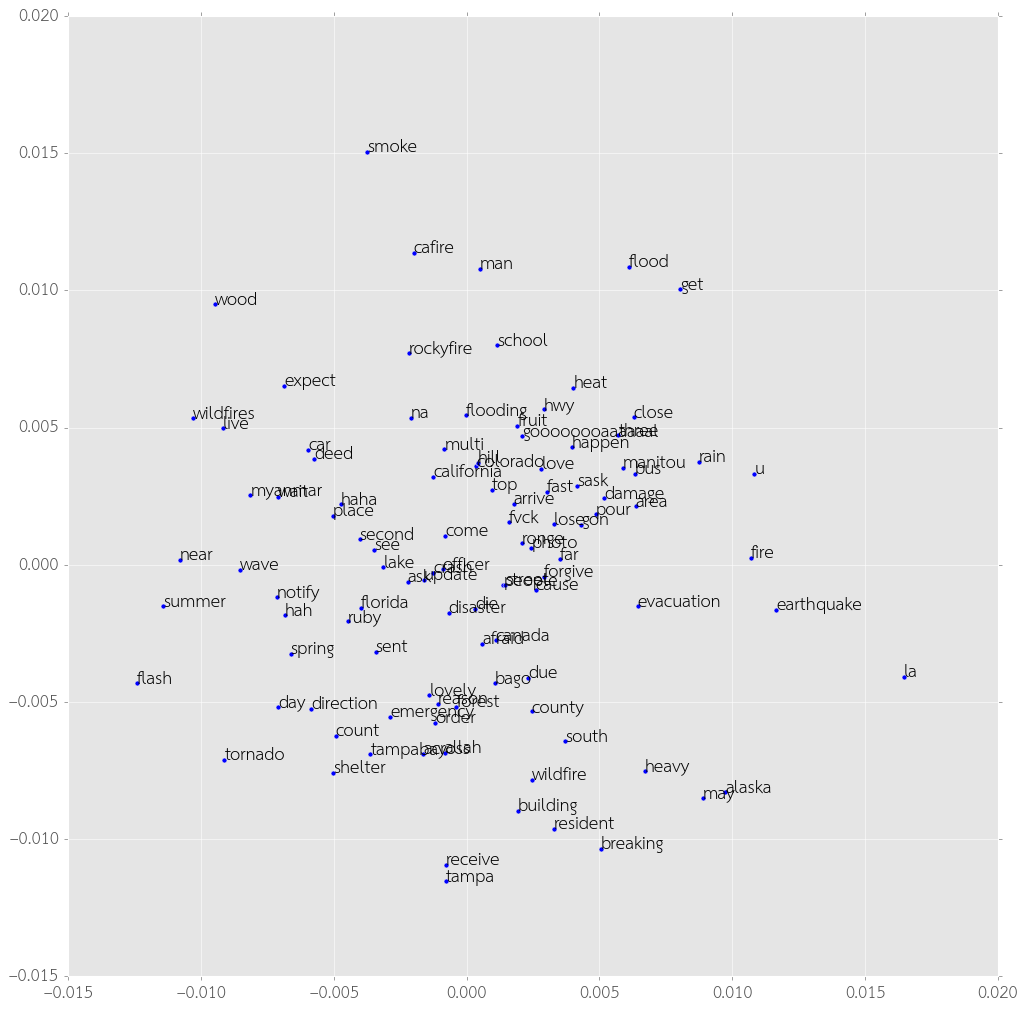

In [ ]:
#Plot Word Vectors Using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)   # แค่ 2 dimension x และ y
result = pca.fit_transform(X_2)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model_2.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# **ส่วนโมเดล**

In [ ]:
df_train.head()

,id,keyword,location,text,target,clean_text,clean_text_tok
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,"[deed, reason, earthquake, may, allah, forgive..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,"[resident, ask, shelter, place, notify, office..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,"[people, receive, wildfire, evacuation, order,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,get sent photo ruby alaska smoke wildfires pou...,"[get, sent, photo, ruby, alaska, smoke, wildfi..."


# **Feature text**

TRAIN TEST SPLITTING OF LABELLED DATASET

In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION
 
# Input: "reviewText", "rating" and "time"
# Target: "log_votes"
X_train, X_val, y_train, y_val = train_test_split(df_train['clean_text'],
                                                  df_train["target"],
                                                  test_size=0.2,
                                                  shuffle=True)
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

TF-IDF

In [ ]:
#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will 
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible

Word2Vec

In [ ]:
model = Word2Vec(df_train['clean_text_tok'],min_count=1)


w2v = dict(zip(model.wv.index2word, model.wv.syn0))  #combination of word and its vector

#for converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


In [ ]:
#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

# **FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)**

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=3, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       838
           1       0.82      0.70      0.76       685

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.79      1523

Confusion Matrix: [[735 103]
 [206 479]]
AUC: 0.865108966430326


# **FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)**

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
#It's a probabilistic classifier that makes use of Bayes' Theorem, a rule that uses probability to make predictions based on prior knowledge of conditions that might be related. This algorithm is the most suitable for such large dataset as it considers each feature independently, calculates the probability of each category, and then predicts the category with the highest probability.

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       838
           1       0.85      0.67      0.75       685

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523

Confusion Matrix: [[759  79]
 [223 462]]
AUC: 0.8679102137518945


# **FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)**

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.59      0.98      0.73       838
           1       0.86      0.15      0.26       685

    accuracy                           0.61      1523
   macro avg       0.72      0.57      0.49      1523
weighted avg       0.71      0.61      0.52      1523

Confusion Matrix: [[821  17]
 [582 103]]
AUC: 0.6684598365939062


## **TRAIN TEST SPLITTING OF LABELLED DATASET**

In [ ]:

#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION
 
# Input: "reviewText", "rating" and "time"
# Target: "log_votes"
X_train, X_val, y_train, y_val = train_test_split(df_train['clean_text_key'],
                                                  df_train["target"],
                                                  test_size=0.2,
                                                  shuffle=True)
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

TF-IDF

In [ ]:
#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will 
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible

Word2Vec

In [ ]:
model = Word2Vec(df_train['text_key_tok'],min_count=1)  #min_count=1 means word should be present at least across all documents,
#if min_count=2 means if the word is present less than 2 times across all the documents then we shouldn't consider it


w2v = dict(zip(model.wv.index2word, model.wv.syn0))  #combination of word and its vector

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """


In [ ]:

#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

## **FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)**

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       886
           1       0.76      0.72      0.74       625

    accuracy                           0.79      1511
   macro avg       0.78      0.78      0.78      1511
weighted avg       0.79      0.79      0.79      1511

Confusion Matrix: [[744 142]
 [176 449]]
AUC: 0.8514627539503387


## **FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)**

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
#It's a probabilistic classifier that makes use of Bayes' Theorem, a rule that uses probability to make predictions based on prior knowledge of conditions that might be related. This algorithm is the most suitable for such large dataset as it considers each feature independently, calculates the probability of each category, and then predicts the category with the highest probability.

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       886
           1       0.81      0.68      0.74       625

    accuracy                           0.80      1511
   macro avg       0.81      0.79      0.79      1511
weighted avg       0.81      0.80      0.80      1511

Confusion Matrix: [[789  97]
 [198 427]]
AUC: 0.8645101580135439


## **FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)**

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.66      0.93      0.77       886
           1       0.75      0.32      0.44       625

    accuracy                           0.67      1511
   macro avg       0.70      0.62      0.61      1511
weighted avg       0.70      0.67      0.63      1511

Confusion Matrix: [[821  65]
 [428 197]]
AUC: 0.7319060948081264


# **Feature keyword**

In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION
 
# Input: "reviewText", "rating" and "time"
# Target: "log_votes"
X_traink, X_valk, y_traink, y_valk = train_test_split(df_cleankey['clean_key'],
                                                  df_cleankey["target"],
                                                  test_size=0.2,
                                                  shuffle=True)
X_train_tokk= [nltk.word_tokenize(i) for i in X_traink]  #for word2vec
X_val_tokk= [nltk.word_tokenize(i) for i in X_valk]      #for word2vec

In [ ]:
#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidfk = tfidf_vectorizer.fit_transform(X_traink) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidfk = tfidf_vectorizer.transform(X_valk) #Don't fit() your TfidfVectorizer to your test data: it will 
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible

In [ ]:
df_cleankey['clean_key_tok']=[nltk.word_tokenize(i) for i in df_cleankey['clean_key']]

In [ ]:
modelk = Word2Vec(df_cleankey['clean_key_tok'],min_count=1)

w2vk = dict(zip(modelk.wv.index2word, model.wv.syn0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Word2vec
# Fit and transform
modelwk = MeanEmbeddingVectorizer(w2vk)
X_train_vectors_w2vk = modelw.transform(X_train_tokk)
X_val_vectors_w2vk = modelw.transform(X_val_tokk)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidfk, y_traink)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidfk)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidfk)[:,1]
 

print(classification_report(y_valk,y_predict))
print('Confusion Matrix:',confusion_matrix(y_valk, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_valk, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.74      0.79      0.77       877
           1       0.68      0.62      0.65       634

    accuracy                           0.72      1511
   macro avg       0.71      0.70      0.71      1511
weighted avg       0.72      0.72      0.72      1511

Confusion Matrix: [[694 183]
 [243 391]]
AUC: 0.7857605329323869


In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
#It's a probabilistic classifier that makes use of Bayes' Theorem, a rule that uses probability to make predictions based on prior knowledge of conditions that might be related. This algorithm is the most suitable for such large dataset as it considers each feature independently, calculates the probability of each category, and then predicts the category with the highest probability.

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidfk, y_traink)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidfk)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidfk)[:,1]
 

print(classification_report(y_valk,y_predict))
print('Confusion Matrix:',confusion_matrix(y_valk, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_valk, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       877
           1       0.67      0.64      0.65       634

    accuracy                           0.71      1511
   macro avg       0.71      0.70      0.71      1511
weighted avg       0.71      0.71      0.71      1511

Confusion Matrix: [[677 200]
 [231 403]]
AUC: 0.7828397641802962


In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2vk, y_traink)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_val_vectors_w2vk)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2vk)[:,1]
 

print(classification_report(y_valk,y_predict))
print('Confusion Matrix:',confusion_matrix(y_valk, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_valk, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.62      0.92      0.74       877
           1       0.67      0.23      0.34       634

    accuracy                           0.63      1511
   macro avg       0.65      0.57      0.54      1511
weighted avg       0.64      0.63      0.57      1511

Confusion Matrix: [[807  70]
 [490 144]]
AUC: 0.7039951944001812


# **Feature text โดยใช้ KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()

In [ ]:
#tf-idf
clf_knn.fit(X_train_vectors_tfidf, y_train)
y_predict = clf_knn.predict(X_val_vectors_tfidf)
y_prob = clf_knn.predict_proba(X_val_vectors_tfidf)[:,1]
    
    
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.76      0.85      0.81       878
           1       0.76      0.64      0.70       645

    accuracy                           0.76      1523
   macro avg       0.76      0.75      0.75      1523
weighted avg       0.76      0.76      0.76      1523

Confusion Matrix: [[750 128]
 [231 414]]
AUC: 0.8011539616111317


In [ ]:
#w2v
clf_knn.fit(X_train_vectors_w2v, y_train)
y_predict = clf_knn.predict(X_val_vectors_w2v)
y_prob = clf_knn.predict_proba(X_val_vectors_w2v)[:,1]
    
    
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.69      0.77      0.73       878
           1       0.63      0.53      0.58       645

    accuracy                           0.67      1523
   macro avg       0.66      0.65      0.65      1523
weighted avg       0.67      0.67      0.67      1523

Confusion Matrix: [[680 198]
 [304 341]]
AUC: 0.6874768236478254


# **Feature text โดยใช้ Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier()

In [ ]:
#tfidf
clf_tree.fit(X_train_vectors_tfidf, y_train)
y_predict = clf_tree.predict(X_val_vectors_tfidf)
y_prob = clf_tree.predict_proba(X_val_vectors_tfidf)[:,1]

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       878
           1       0.70      0.71      0.71       645

    accuracy                           0.75      1523
   macro avg       0.74      0.74      0.74      1523
weighted avg       0.75      0.75      0.75      1523

Confusion Matrix: [[678 200]
 [184 461]]
AUC: 0.7425623774964243


In [ ]:
#w2v
clf_tree.fit(X_train_vectors_w2v, y_train)
y_predict = clf_tree.predict(X_val_vectors_w2v)
y_prob = clf_tree.predict_proba(X_val_vectors_w2v)[:,1]

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.68      0.67      0.67       878
           1       0.55      0.56      0.56       645

    accuracy                           0.62      1523
   macro avg       0.62      0.62      0.62      1523
weighted avg       0.62      0.62      0.62      1523

Confusion Matrix: [[586 292]
 [281 364]]
AUC: 0.6119245642845791
